In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('1. Regression - Module - (Housing Prices).csv')

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data['Sale Price'].mean()

540198.4357443658

In [5]:
data['Zipcode'].unique()

array([98178., 98125., 98028., 98136., 98074., 98053., 98003., 98198.,
       98146., 98038., 98007., 98115., 98107., 98126., 98019., 98103.,
       98002., 98133., 98040., 98092., 98030., 98119., 98112., 98052.,
       98027., 98117., 98058., 98001., 98056., 98166., 98023., 98070.,
       98148., 98105., 98042., 98008., 98059., 98122., 98144., 98004.,
       98005., 98034., 98075., 98116., 98010., 98118., 98199., 98032.,
       98045., 98102., 98077., 98108., 98168., 98177., 98065., 98029.,
       98006., 98109., 98022., 98033., 98155., 98024., 98011., 98031.,
       98106., 98072., 98188., 98014., 98055.,    nan, 98039.])

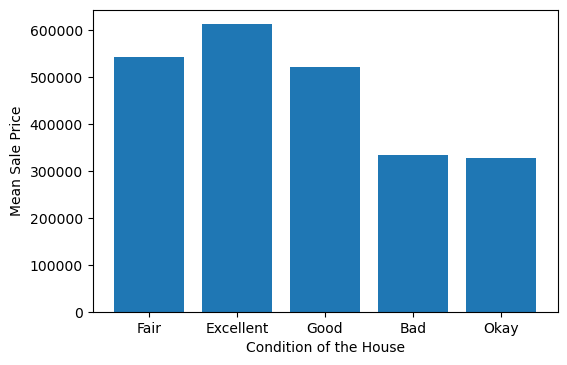

In [6]:
#Initialising a new column
data['condition_sale'] = 0

# Calculating mean based on the condition of the House
for i in data['Condition of the House'].unique():
  data['condition_sale'][data['Condition of the House'] == str(i)] = data['Sale Price'][data['Condition of the House'] == str(i)].mean()

data['condition_sale'].unique()

#Plotting the Mean Sales based on the Condition of the House
plt.figure(dpi=100)
plt.bar(data['Condition of the House'].unique(), data['condition_sale'].unique())
plt.xlabel("Condition of the House")
plt.ylabel('Mean Sale Price')
plt.show()

In [7]:
import time
#Initialising a new column
data['zip_condition_sale'] = 0

C = 'Condition of the House'
Z = "Zipcode"

tick = time.time()
# Calculating mean based on the condition of the House and zipcode
for i in data[C].unique():
  for j in data[Z].unique() :
    data['zip_condition_sale'][(data[C] == str(i)) & (data[Z] == j) ] = data['Sale Price'][(data[C] == str(i)) & (data[Z] == j)].mean()
tock = time.time()
time1 = tock - tick
len(data['zip_condition_sale'].unique())

281

In [8]:
zip_condition_sale = data.groupby(['Condition of the House' , 'Zipcode'])['Sale Price'].mean()

zip_condition_sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [9]:
zip_condition_sale2  = pd.pivot_table(data, index=["Condition of the House","Zipcode"], values=["Sale Price"], aggfunc=np.mean,)
zip_condition_sale2

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [10]:
zipcode_condition_sale3 = pd.pivot_table(data, index=["Zipcode"],columns=['Condition of the House'], values=["Sale Price"], aggfunc= np.mean)
zipcode_condition_sale3

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [11]:
data['plot_length'] = data['Flat Area (in Sqft)']**0.5
data['plot_length'].head()

0    34.351128
1    50.695167
2    27.748874
3    44.271887
4    40.987803
Name: plot_length, dtype: float64

In [12]:
data['total_area'] = data['Flat Area (in Sqft)'] + data['Lot Area (in Sqft)']
data['total_area'].head()

0     6830.0
1     9812.0
2    10770.0
3     6960.0
4     9760.0
Name: total_area, dtype: float64

In [13]:
data['Condition of the House'][data['Condition of the House'] == 'Fair'] = '1'
data['Condition of the House'][data['Condition of the House'] == 'Okay'] = '0'
data['Condition of the House'][data['Condition of the House'] == 'Bad'] = '0'
data['Condition of the House'][data['Condition of the House'] == 'Good'] = '1'
data['Condition of the House'][data['Condition of the House'] == 'Excellent'] = '3'
data['Condition of the House'].unique()

array(['1', '3', '0'], dtype=object)

In [14]:
data['Condition of the House'] = data['Condition of the House'].map({'Good':'1',
                                                                     'Excellent':'3',
                                                                     'Bad':'0',
                                                                     'Fair': '1',
                                                                     'Okay': '0'})
data['Condition of the House'].unique()

array([nan], dtype=object)

In [15]:
year = []
for i in range(len(data['Date House was Sold'])):
  k = data['Date House was Sold'][i].split()[-1]
  year.append(k)

data['year_sold'] = year
data['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [16]:
def year(value):
    return value.split()[-1]

data['year_sold'] = data['Date House was Sold'].map(year)
data['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [17]:
def luxury_home(row):
  count = 0
  if row[0] =='Yes':
    count = count+1
  if row[1] in ['Good', 'Excellent']:
    count = count+1
  if row[2] >= 8:
    count = count+1  
  if count >= 2:
    return 'Yes'
  else:
    return "No"
  
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis = 1)

data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)